In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
df = pd.read_csv("Advertising.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [16]:
# Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Check for duplicates and missing values
print("Duplicate rows:", df.duplicated().sum())
print("Missing values:\n", df.isnull().sum())


Duplicate rows: 0
Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


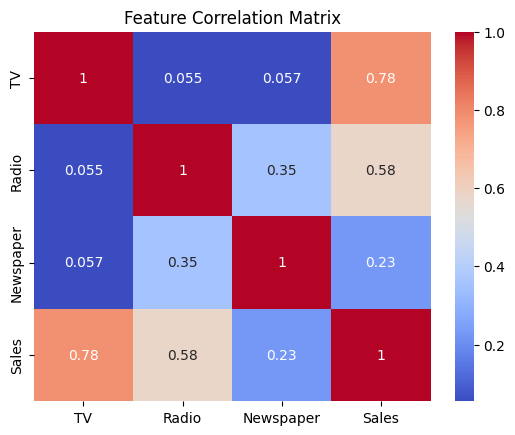

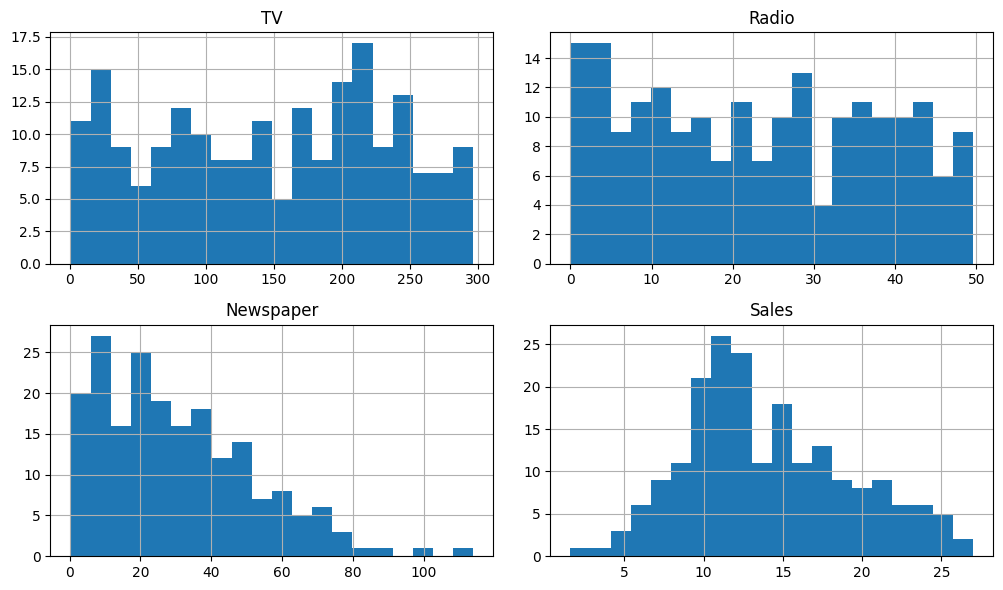

In [17]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
df.hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()


In [18]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (160, 3), Test shape: (40, 3)


In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5, learning_rate=0.1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [20]:
def print_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} performance:")
    print(f"  R2 score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")

print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_gb, "Gradient Boosting")


Linear Regression performance:
  R2 score: 0.8994
  RMSE: 1.7816
  MAE: 1.4608
Random Forest performance:
  R2 score: 0.9815
  RMSE: 0.7648
  MAE: 0.6143
Gradient Boosting performance:
  R2 score: 0.9756
  RMSE: 0.8782
  MAE: 0.6573


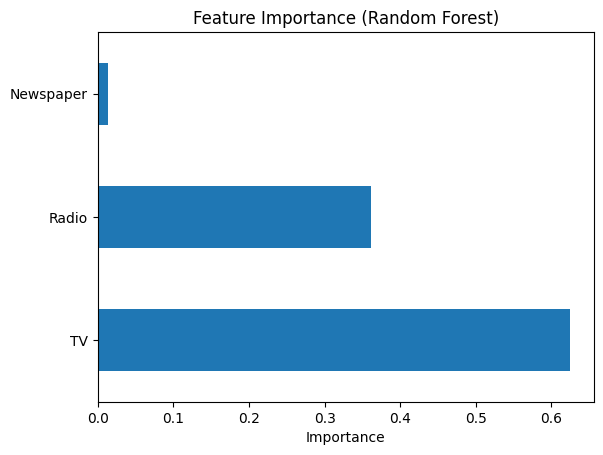

In [21]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importances.plot(kind='barh', title='Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()


In [22]:
baseline = {col: X[col].mean() for col in X.columns}
baseline_sales = rf.predict(pd.DataFrame([baseline]))[0]
print("Baseline predicted sales:", baseline_sales)

scenario_tv = baseline.copy()
scenario_tv['TV'] *= 1.5
sales_tv = rf.predict(pd.DataFrame([scenario_tv]))[0]
print("Increase TV by 50% - Sales:", sales_tv, "Increase:", (sales_tv - baseline_sales)/baseline_sales*100, "%")

scenario_radio = baseline.copy()
scenario_radio['Radio'] *= 1.5
sales_radio = rf.predict(pd.DataFrame([scenario_radio]))[0]
print("Increase Radio by 50% - Sales:", sales_radio, "Increase:", (sales_radio - baseline_sales)/baseline_sales*100, "%")

scenario_news = baseline.copy()
scenario_news['Newspaper'] *= 1.5
sales_news = rf.predict(pd.DataFrame([scenario_news]))[0]
print("Increase Newspaper by 50% - Sales:", sales_news, "Increase:", (sales_news - baseline_sales)/baseline_sales*100, "%")
print("Insights & Recommendations:")
print("- Prioritize TV and Radio spend: highest impact on sales and ROI.")
print("- Reduce Newspaper budget: low return shown in feature importance and scenario analysis.")
print("- Use ensemble models (Random Forest) for best prediction accuracy.")
print("- Update models regularly as data grows and market changes.")
print("- Test optimal budget allocations for best business results.")


Baseline predicted sales: 14.865333333333327
Increase TV by 50% - Sales: 17.251333333333317 Increase: 16.050766884922357 %
Increase Radio by 50% - Sales: 16.872583333333328 Increase: 13.502892636110875 %
Increase Newspaper by 50% - Sales: 14.98133333333333 Increase: 0.7803390438604578 %
Insights & Recommendations:
- Prioritize TV and Radio spend: highest impact on sales and ROI.
- Reduce Newspaper budget: low return shown in feature importance and scenario analysis.
- Use ensemble models (Random Forest) for best prediction accuracy.
- Update models regularly as data grows and market changes.
- Test optimal budget allocations for best business results.


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_and_clean_data(filepath):
    df = pd.read_csv(filepath)
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    if df.isnull().sum().sum() > 0:
        raise ValueError("Dataset contains missing values")
    if df.duplicated().sum() > 0:
        raise ValueError("Dataset contains duplicated rows")
    return df

def prepare_features(df):
    X = df[['TV', 'Radio', 'Newspaper']]
    y = df['Sales']
    return train_test_split(X, y, test_size=0.2, random_state=57)

def train_models(X_train, y_train):
    models = {}

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    models['Linear Regression'] = lr

    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=57)
    rf.fit(X_train, y_train)
    models['Random Forest'] = rf

    gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=57)
    gb.fit(X_train, y_train)
    models['Gradient Boosting'] = gb

    return models

def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
        print(f"Model: {name}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  R2 Score: {r2:.4f}\n")
    return results

def scenario_analysis(model, X):
    baseline = {
        'TV': X['TV'].mean(),
        'Radio': X['Radio'].mean(),
        'Newspaper': X['Newspaper'].mean()
    }
    baseline_sales = model.predict(pd.DataFrame([baseline]))[0]
    print(f"Baseline (average spend): predicted sales = {baseline_sales:.2f}k")

    # TV budget +50%
    s = baseline.copy()
    s['TV'] *= 1.5
    sales = model.predict(pd.DataFrame([s]))[0]
    inc = (sales - baseline_sales) / baseline_sales * 100
    print(f"TV budget +50% -> sales: {sales:.2f}k (+{inc:.2f}%)")

    # Radio budget +50%
    s = baseline.copy()
    s['Radio'] *= 1.5
    sales = model.predict(pd.DataFrame([s]))[0]
    inc = (sales - baseline_sales) / baseline_sales * 100
    print(f"Radio budget +50% -> sales: {sales:.2f}k (+{inc:.2f}%)")

    # Newspaper budget +50%
    s = baseline.copy()
    s['Newspaper'] *= 1.5
    sales = model.predict(pd.DataFrame([s]))[0]
    inc = (sales - baseline_sales) / baseline_sales * 100
    print(f"Newspaper budget +50% -> sales: {sales:.2f}k (+{inc:.2f}%)")

    # Optimized allocation
    s = {
        'TV': baseline['TV'] * 1.4,
        'Radio': baseline['Radio'] * 1.3,
        'Newspaper': baseline['Newspaper'] * 0.5
    }
    sales = model.predict(pd.DataFrame([s]))[0]
    inc = (sales - baseline_sales) / baseline_sales * 100
    print(f"Optimized allocation -> sales: {sales:.2f}k (+{inc:.2f}%)")

def main():
    print("Loading and cleaning data...")
    df = load_and_clean_data('Advertising.csv')

    print("Preparing training and testing data...")
    X_train, X_test, y_train, y_test = prepare_features(df)

    print("Training models...")
    models = train_models(X_train, y_train)

    print("Evaluating models...")
    results = evaluate_models(models, X_test, y_test)

    best_model_name = max(results, key=lambda x: results[x]['R2'])
    best_model = models[best_model_name]
    print(f"Best model selected: {best_model_name}")

    print("Performing scenario analysis...")
    scenario_analysis(best_model, df[['TV', 'Radio', 'Newspaper']])

if __name__ == '__main__':
    main()


Loading and cleaning data...
Preparing training and testing data...
Training models...
Evaluating models...
Model: Linear Regression
  RMSE: 1.3897
  MAE: 1.1145
  R2 Score: 0.9407

Model: Random Forest
  RMSE: 0.6393
  MAE: 0.4887
  R2 Score: 0.9875

Model: Gradient Boosting
  RMSE: 0.7521
  MAE: 0.5857
  R2 Score: 0.9826

Best model selected: Random Forest
Performing scenario analysis...
Baseline (average spend): predicted sales = 14.86k
TV budget +50% -> sales: 17.10k (+15.08%)
Radio budget +50% -> sales: 16.79k (+12.99%)
Newspaper budget +50% -> sales: 14.97k (+0.77%)
Optimized allocation -> sales: 18.52k (+24.66%)
